# k-Vizinhos mais Próximos (kNN)

[https://archive.ics.uci.edu/ml/datasets/glass+identification](https://archive.ics.uci.edu/ml/datasets/glass+identification)

### Bibliotecas e Carregamento

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/glass.csv')

In [3]:
figsize=(12, 6)

### Informações iniciais

| Coluna | Descrição |
| -- | -- |
| Id number | 1 to 214 |
| Refractive index |  |
| Na | Sodium (unit measurement weight percent in corresponding oxide, as are attributes 4-10)
| Mg | Magnesium |
| Al | Aluminum |
| Si | Silicon |
| K | Potassium |
| Ca | Calcium |
| Ba | Barium |
| Fe | Iron |
    | Type | `1`: building_windows_float_processed, `2`: building_windows_non_float_processed, `3`: vehicle_windows_float_processed, `4`: vehicle_windows_non_float_processed (none in this database), `5`: containers, `6`: tableware, `7`: headlamps |

head, shape, info

In [4]:
df.head()

,Id,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.shape

(214, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                214 non-null    int64  
 1   Refractive Index  214 non-null    float64
 2   Na                214 non-null    float64
 3   Mg                214 non-null    float64
 4   Al                214 non-null    float64
 5   Si                214 non-null    float64
 6   K                 214 non-null    float64
 7   Ca                214 non-null    float64
 8   Ba                214 non-null    float64
 9   Fe                214 non-null    float64
 10  Type              214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Drop Id

In [7]:
df.drop(['Id'], axis=1, inplace=True)

Descrição dos dados

In [8]:
df.describe()

,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Dados faltantes

In [9]:
df.isnull().sum()

Refractive Index    0
Na                  0
Mg                  0
Al                  0
Si                  0
K                   0
Ca                  0
Ba                  0
Fe                  0
Type                0
dtype: int64

### Gráficos

Countplot Type

/home/vauxgomes/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

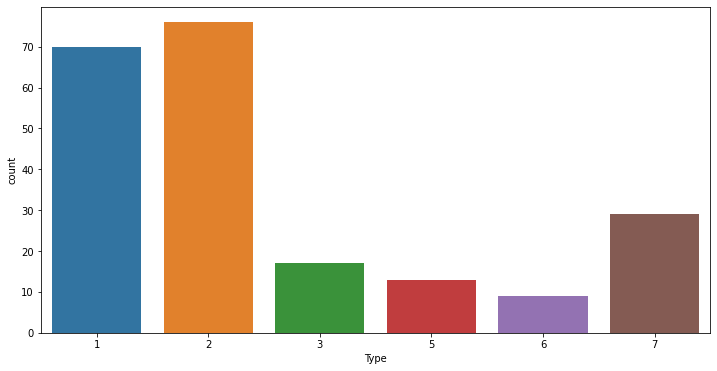

In [10]:
plt.figure(figsize=figsize)
sns.countplot(df['Type'])

Correlação com heatmap

<AxesSubplot:>

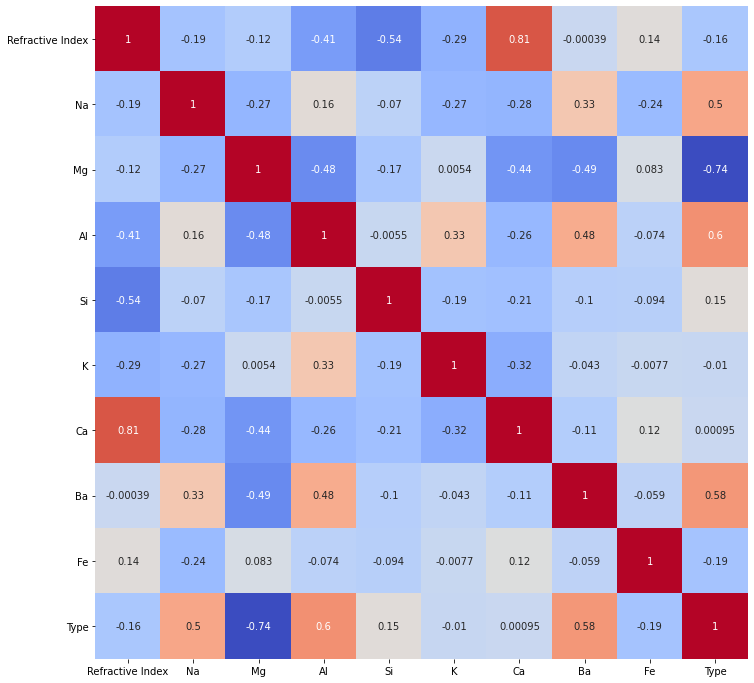

In [11]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), square = True, annot=True, cbar=False, cmap= 'coolwarm')

Scatter Type x Refractive Index, Hue Type

<AxesSubplot:xlabel='Type', ylabel='Refractive Index'>

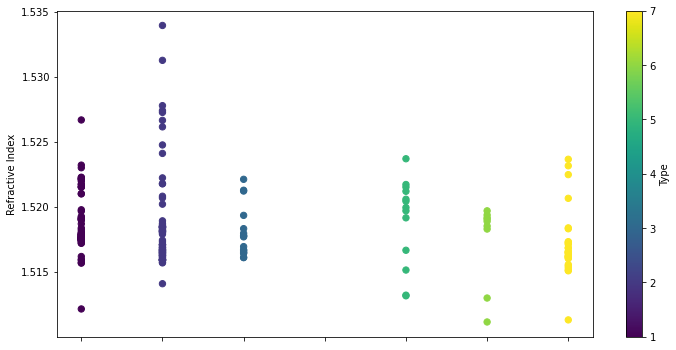

In [12]:
df.plot.scatter(x='Type', y='Refractive Index', figsize=figsize, s=40, c='Type', cmap='viridis')

Scatter Al x Si, Hue Type

<AxesSubplot:xlabel='Al', ylabel='Si'>

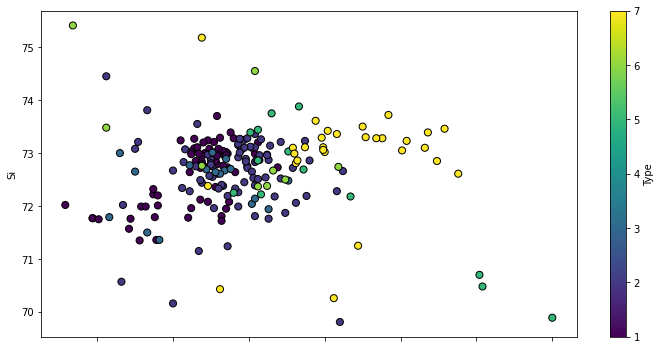

In [13]:
df.plot.scatter(x='Al', y='Si', figsize=figsize, s=50, c='Type', cmap='viridis', edgecolor='black')

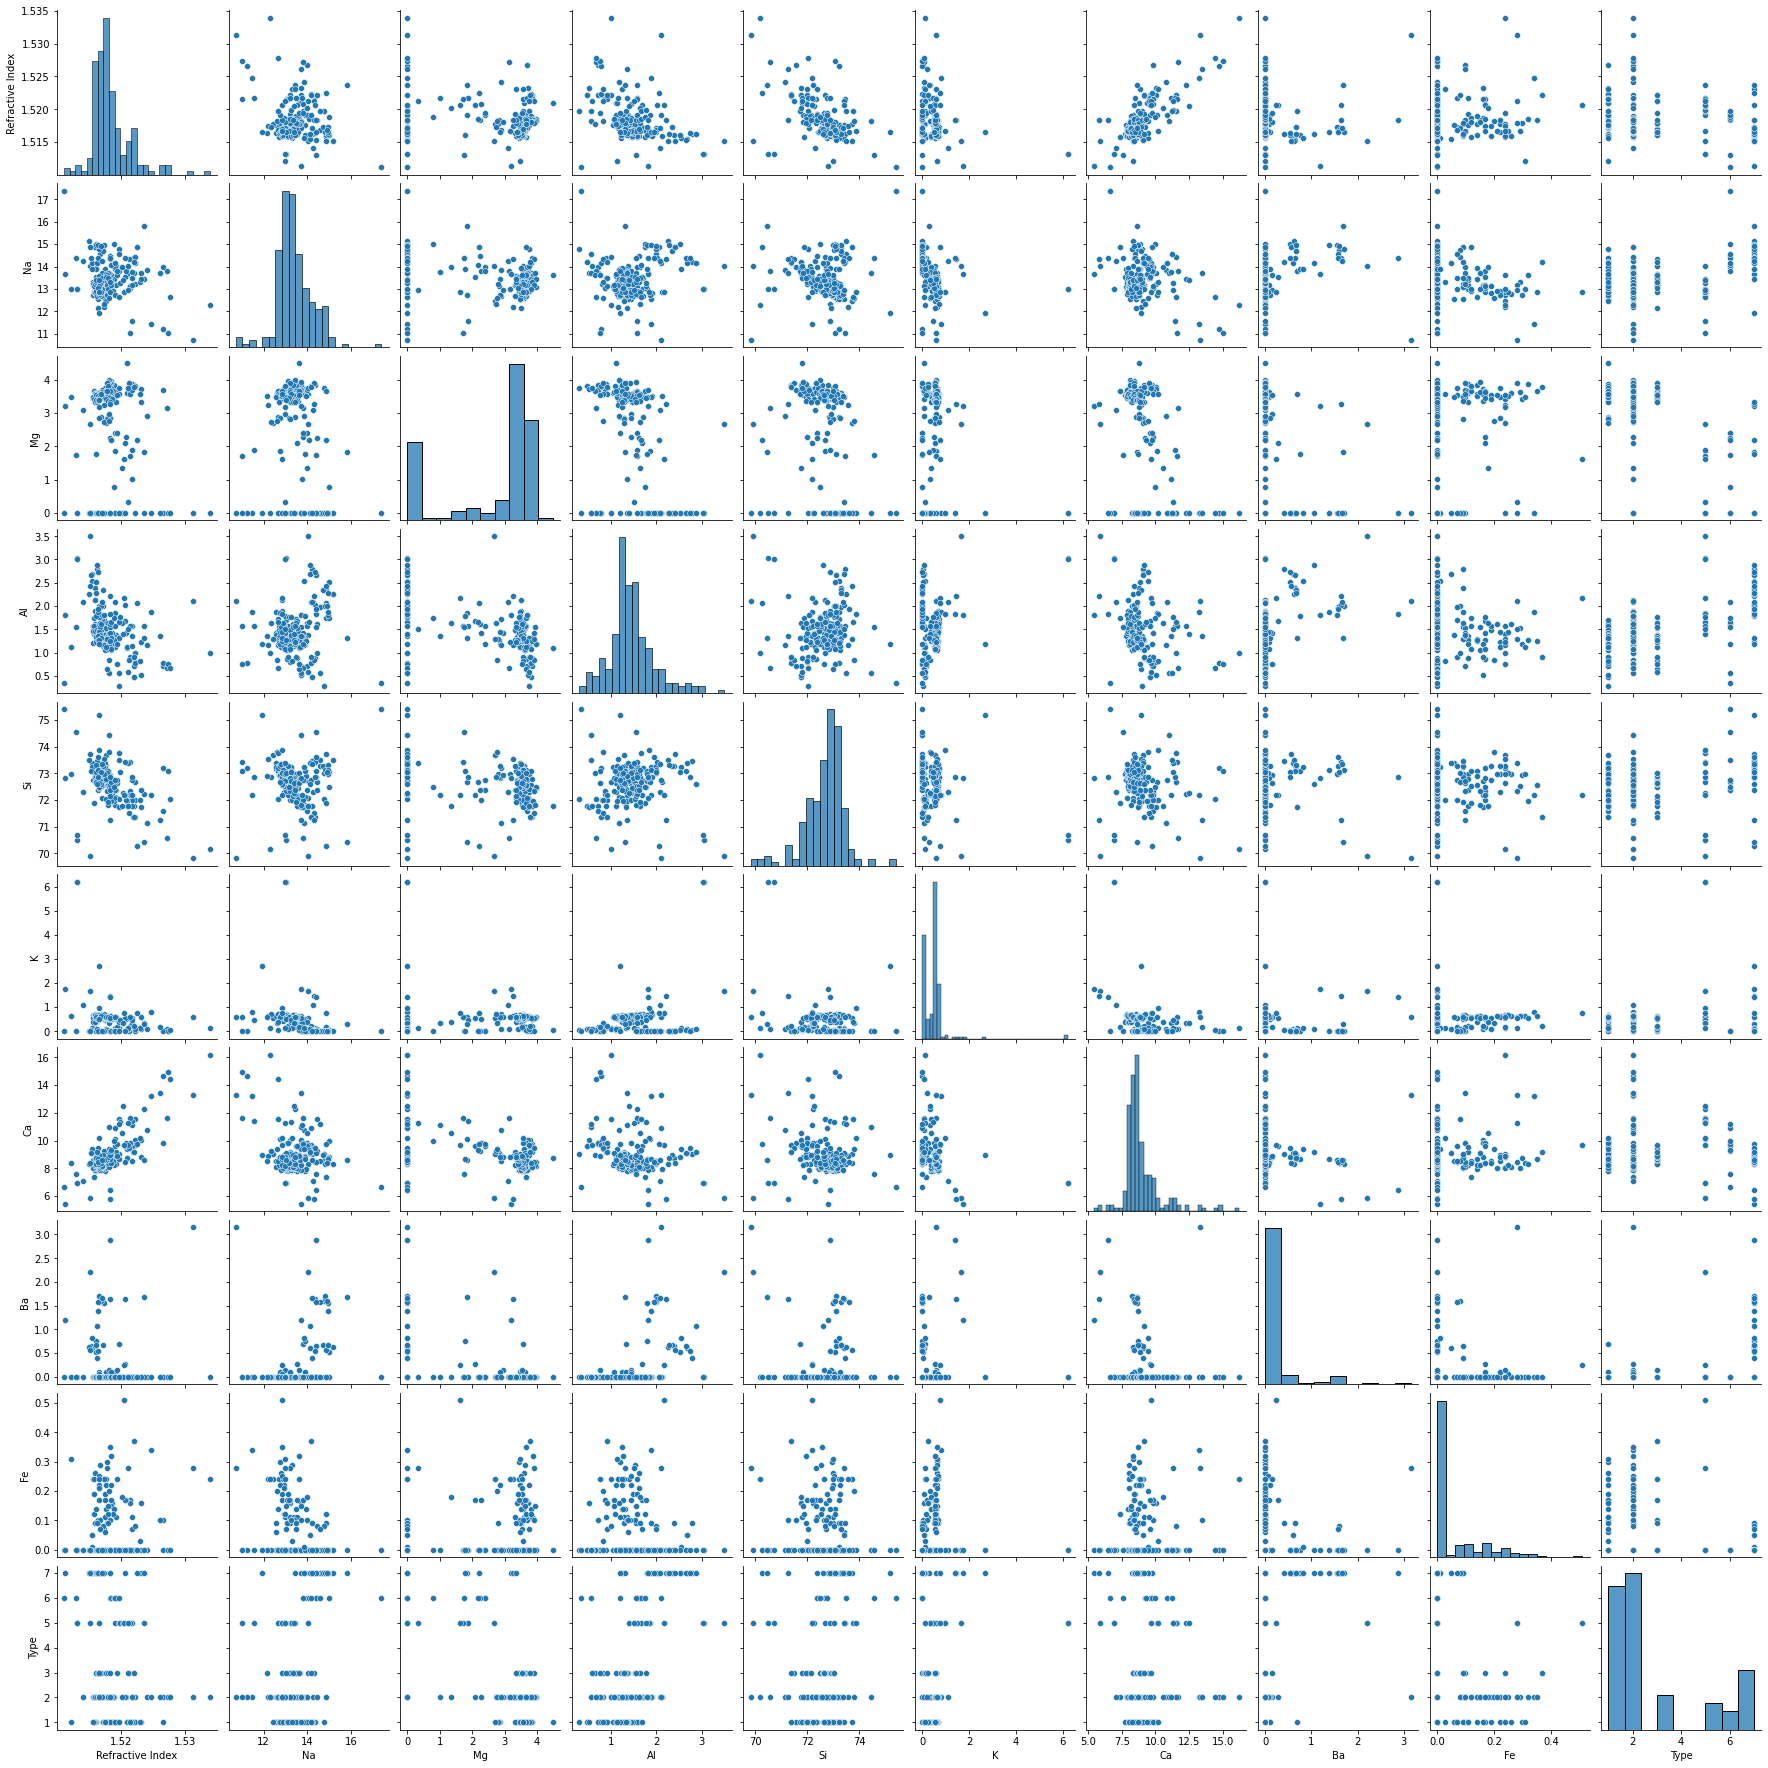

In [14]:
sns.pairplot(df)

Normalizar e plotar o boxplot

```py
from sklearn.preprocessing import MinMaxScaler
```

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

df_ = pd.DataFrame(
    data=scaler.fit_transform(df[['Refractive Index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]),
    columns= ['Refractive Index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
)

<AxesSubplot:>

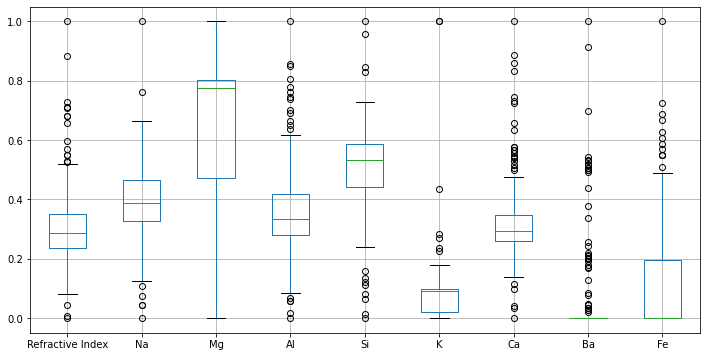

In [17]:
df_.boxplot(figsize=figsize)

Describe

In [18]:
df.describe()

,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Split dos dados

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df.columns

Index(['Refractive Index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type'],
      dtype='object')

In [21]:
X = df[['Refractive Index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = df['Type']

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)

### Criando um modelo

In [23]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [24]:
# Por padrão n_neighbors = 5
clf = KNN()

In [25]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

### Predição

In [26]:
y_hat = clf.predict(X_test)

### Qualidade do modelo
```py
from sklearn.metrics import classification_report, accuracy_score
```

In [27]:
from sklearn.metrics import classification_report, accuracy_score

In [28]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.69      0.88      0.77        25
           2       0.79      0.71      0.75        21
           3       0.00      0.00      0.00         7
           5       0.50      1.00      0.67         2
           6       0.50      1.00      0.67         1
           7       1.00      0.89      0.94         9

    accuracy                           0.74        65
   macro avg       0.58      0.75      0.63        65
weighted avg       0.68      0.74      0.70        65



/home/vauxgomes/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Escolhedo um valor para $k$

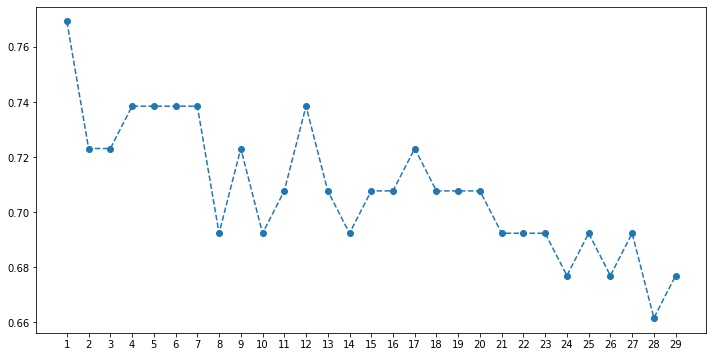

In [50]:
kmax = 30
acc = []
err = []

for k in range(1, kmax):
    clf = KNN(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    
    acc.append(accuracy_score(y_test, y_hat))
    err.append(np.mean(y_test!=y_hat))
    
plt.figure(figsize=figsize)
plt.xticks(range(1, kmax))
plt.plot(range(1, kmax), acc, marker='o', linestyle='--')
#plt.plot(range(1, kmax), err, marker='o', linestyle='--')